In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import keras
import os
from tqdm import tqdm
import json
import warnings
import pickle
import pandas as pd
warnings.filterwarnings('ignore')


In [17]:
train_json = 'train.json'
test_json = 'test.json'

In [18]:
images_path = 'performing_detection/agri_data/'

In [19]:
with open(train_json,'r') as train:
    train_data = json.load(train)

In [20]:
with open(test_json,'r') as test:
    test_data = json.load(test)

In [21]:
train_images_list = list(train_data.keys())
test_images_list =list(test_data.keys())

# <h3>Creating folders</h3>

In [7]:
os.mkdir('Train')
os.mkdir('Test')

In [8]:
os.mkdir('Train/weed')
os.mkdir('Train/crop')
os.mkdir('Train/background')

os.mkdir('Test/weed')
os.mkdir('Test/crop')
os.mkdir('Test/background')

<h3>Generating Images</h3>

In [9]:
#For Training
for count,img_id in tqdm(enumerate(train_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in train_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) +'.jpeg',temp_img)
        
    
    for background in train_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Train/'+label+'/'+ label+'_'+ str(len(os.listdir('Train/'+label))) + '.jpeg',temp_img)

1000it [08:23,  1.99it/s]


In [10]:
#For Testing
for count,img_id in tqdm(enumerate(test_images_list)):
    img = cv2.imread(images_path + img_id)
    
    
    for proposal in test_data[img_id]['region_proposal']:
        x,y,w,h = proposal[0]
        label   = proposal[1]
         
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) +'.jpeg',temp_img)
        
    
    for background in test_data[img_id]['negative_example']:
        x,y,w,h = background
        label = 'background'
        
        temp_img = cv2.cvtColor(cv2.resize(img[y:y+h,x:x+w,:],(224,224)),cv2.COLOR_BGR2RGB)
        
        cv2.imwrite('Test/'+label+'/'+ label+'_'+ str(len(os.listdir('Test/'+label))) + '.jpeg',temp_img)

300it [01:33,  3.21it/s]


In [11]:
print('Total training weed images are {}'.format(len(os.listdir('Train/weed'))))
print('Total training crop images are {}'.format(len(os.listdir('Train/crop'))))
print('Total training background images are {}'.format(len(os.listdir('Train/background'))))

Total training weed images are 7721
Total training crop images are 10298
Total training background images are 35405


In [12]:
print('Total testing weed images are {}'.format(len(os.listdir('Test/weed'))))
print('Total testing crop images are {}'.format(len(os.listdir('Test/crop'))))
print('Total testing background images are {}'.format(len(os.listdir('Test/background'))))

Total testing weed images are 2331
Total testing crop images are 3147
Total testing background images are 10760


<h2>Visualizing Images</h2>

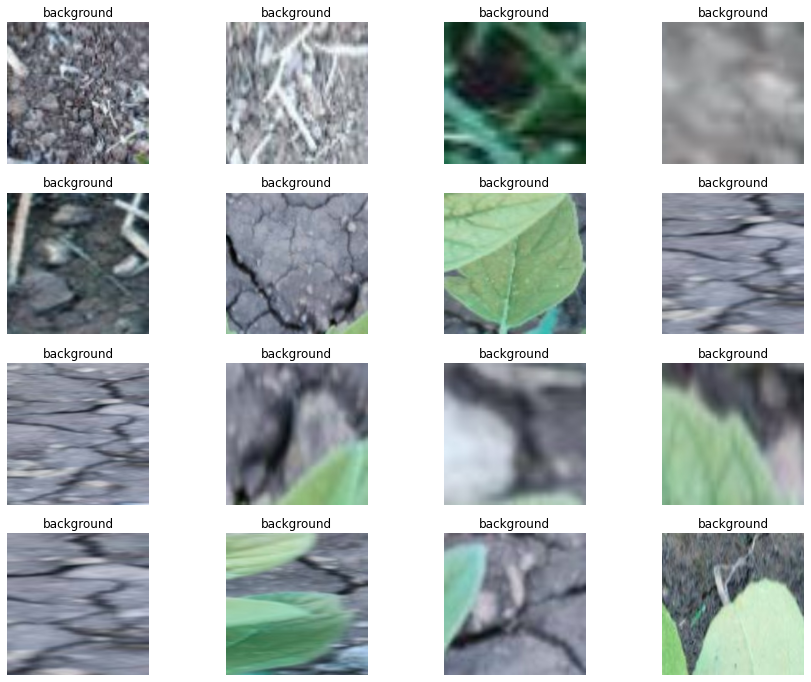

In [13]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/background')[:16]):
    plt.subplot(4,4,i+1)
    plt.title('background')
    img = cv2.imread('Train/background/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show() 

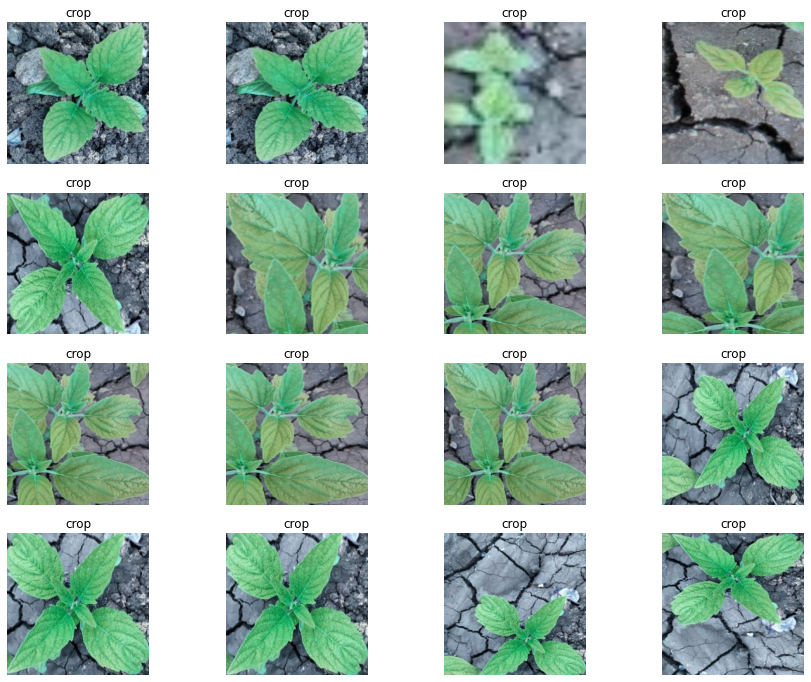

In [14]:
plt.figure(figsize=(15,12))
for i,img in enumerate(os.listdir('Train/crop')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('crop')
    img = cv2.imread('Train/crop/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')

plt.show()

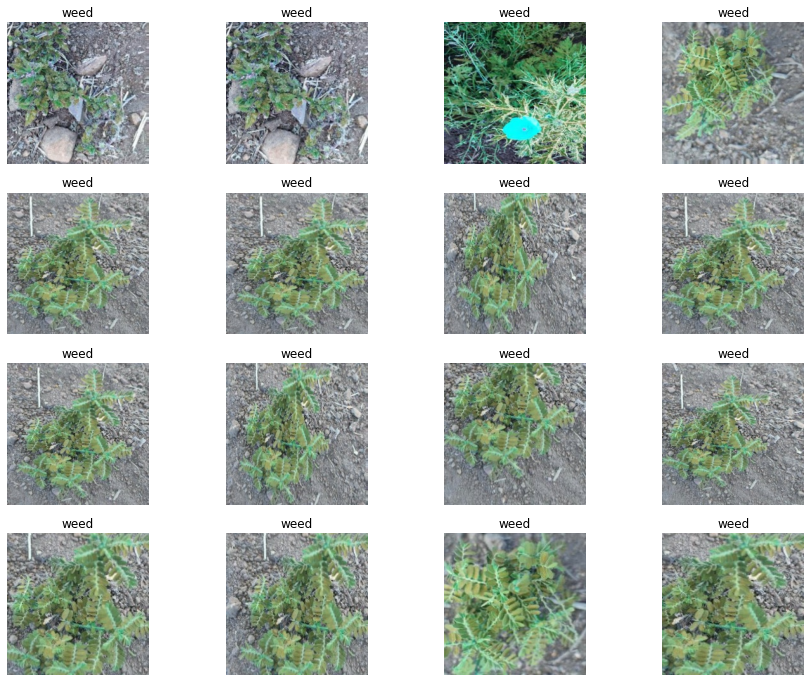

In [15]:
plt.figure(figsize=(15,12))

for i,img in enumerate(os.listdir('Train/weed')[0:16]):
    plt.subplot(4,4,i+1)
    plt.title('weed')
    img = cv2.imread('Train/weed/'+img)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
plt.show()   